In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import copy
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [3]:
Cerebral_Stroke=pd.read_csv("dataset.csv")

In [4]:
Cerebral_Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
Cerebral_Stroke.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [6]:
Cerebral_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
Cerebral_Stroke.nunique()

id                   43400
gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64

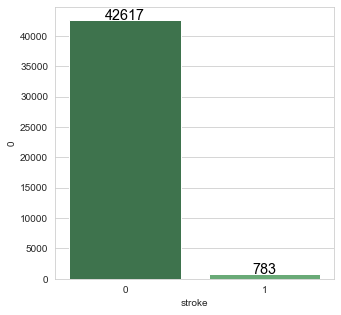

In [8]:
#Calculating count of Stroke vs No Stroke cases
plt.figure(figsize=(5,5))
target_group = Cerebral_Stroke.groupby('stroke').size().reset_index()
pal = sns.color_palette("Greens_d", len(target_group))
rank = target_group["stroke"].argsort().argsort()
g = sns.barplot(x = target_group['stroke'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['stroke'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

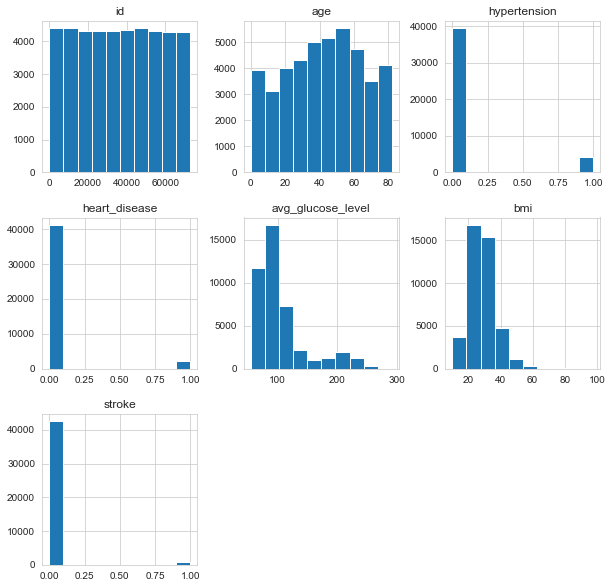

In [9]:
#Distribution of continuous 
Cerebral_Stroke.hist(figsize=(10,10))
plt.show()

In [10]:
#all the categorical columns with their values -
cols=Cerebral_Stroke.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(Cerebral_Stroke[i].unique())
    print("")


Distinct_values :
 'column_name' = gender
['Male' 'Female' 'Other']

Distinct_values :
 'column_name' = ever_married
['No' 'Yes']

Distinct_values :
 'column_name' = work_type
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']

Distinct_values :
 'column_name' = Residence_type
['Rural' 'Urban']

Distinct_values :
 'column_name' = smoking_status
[nan 'never smoked' 'formerly smoked' 'smokes']



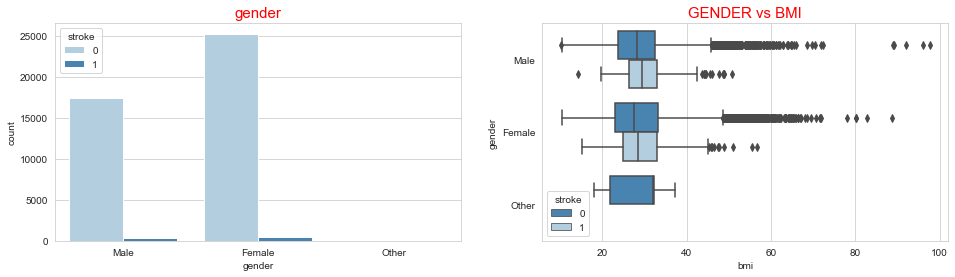

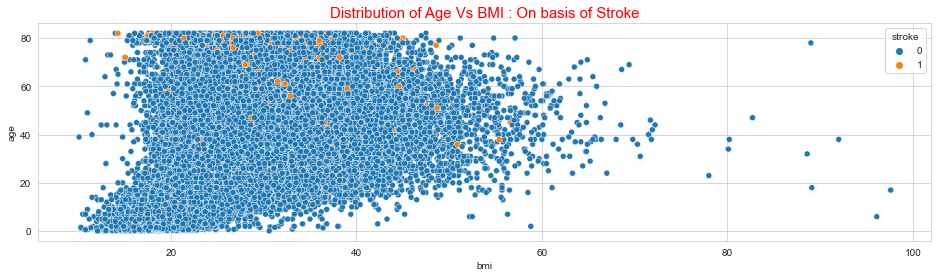

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(Cerebral_Stroke["gender"],hue="stroke",data=Cerebral_Stroke,palette="Blues")
plt.title("gender",fontsize=15,color="Red")
plt.subplot(122)
sns.boxplot(x="bmi",y="gender",hue="stroke",data=Cerebral_Stroke,palette="Blues_r")
plt.title("GENDER vs BMI",fontsize=15,color="Red")
plt.figure(figsize=(16,4))
sns.scatterplot(Cerebral_Stroke["bmi"],Cerebral_Stroke["age"],hue=Cerebral_Stroke["stroke"])
plt.title("Distribution of Age Vs BMI : On basis of Stroke",fontsize=15,color="Red")
plt.show()

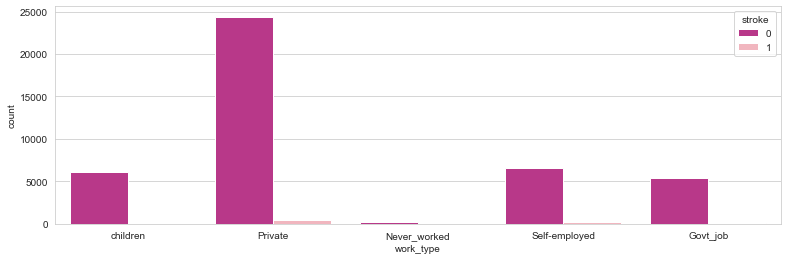

In [12]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["work_type"],hue="stroke",data=Cerebral_Stroke,palette="RdPu_r")
plt.show()

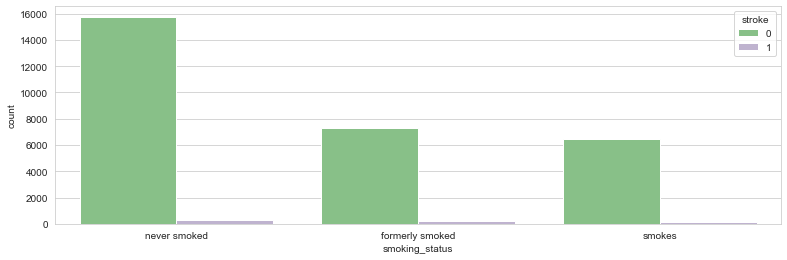

In [13]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["smoking_status"],hue="stroke",data=Cerebral_Stroke,palette="Accent")
plt.show()

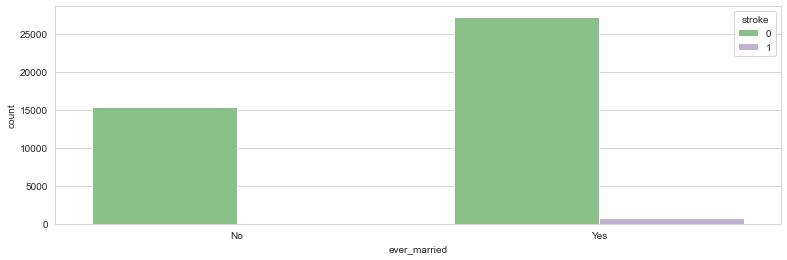

In [14]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["ever_married"],hue="stroke",data=Cerebral_Stroke,palette="Accent")
plt.show()

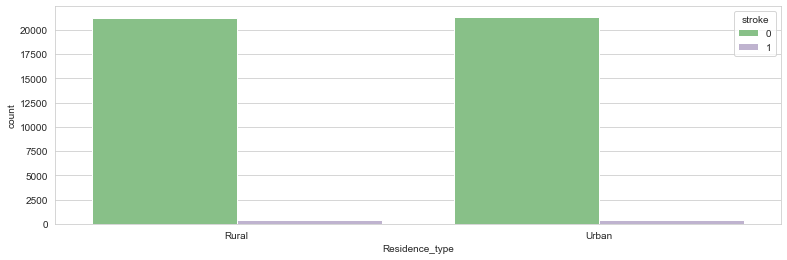

In [15]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["Residence_type"],hue="stroke",data=Cerebral_Stroke,palette="Accent")
plt.show()

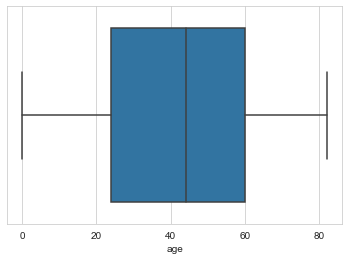

In [16]:
sns.boxplot(Cerebral_Stroke["age"])
plt.show()

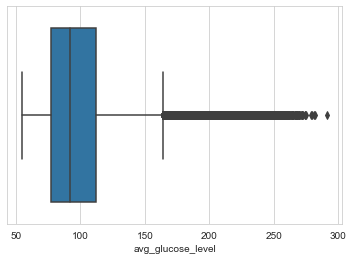

In [17]:
sns.boxplot(Cerebral_Stroke["avg_glucose_level"])
plt.show()

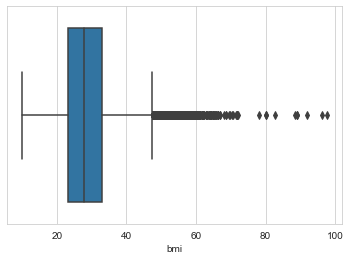

In [18]:
sns.boxplot(Cerebral_Stroke["bmi"])
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(Cerebral_Stroke["avg_glucose_level"], color='green')
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(["avg_glucose_level"],hue="stroke",data=Cerebral_Stroke)
plt.title("Glucose Level vs  Stroke",fontsize=20,color="BLUE")
plt.legend()
plt.show()